
<center><h1>Iterative Methods for Solving Linear Equations Systems</h1></center>



## Introduction

**Description**<br>

Linear systems of equations, represented by the equation Ax = b, are ubiquitous in scientific computing. While direct methods like LU decomposition offer a guaranteed solution in a finite number of steps, their computational cost can become prohibitive for large and sparse matrices. This is where iterative methods shine.



This notebook explores three popular iterative methods for solving linear systems: Jacobi, Gauss-Seidel, and Conjugate Gradient. Each method approaches the solution through successive approximations, aiming to converge to the true solution within a desired tolerance.

<br>



**Aspects**<br>

Here, we'll delve into the following aspects:



*  **Implementation:** We will code Jacobi's and Gauss-Seidel's methods in Python, and we will use the `cg` module from `scipy` for the Conjugate Gradient.

   

*  **Testing and Comparison:** We will test Jacobi's and Gauss-Seidel's methods on a set of well-defined test problems. This will allow us to analyze their:

   

      *  **Convergence Precision:** How close do the approximate solutions get to the true solution?

     

      *  **Convergence Speed:** How many iterations are required to achieve the desired accuracy?

*  **Testing on Large Systems:** We will test the methods on matrices of 100x100.     

*  **Insights and Discussion:** Based on the results, we will discuss the strengths and weaknesses of each method.



## Implementation of Jacobi and Gauss-Seidel

In [1]:
import numpy as np

def jacobi_iteration(a, b, max_iterations, tolerance):
    n = len(a)
    x = np.zeros(n)  # Initialize x to zeros
    x_new = np.zeros(n)  # Initialize the new x values

    contIteraciones = 0

    for iteration in range(max_iterations):
        contIteraciones += 1
        for i in range(n):
            sigma = np.dot(a[i], x) - a[i][i] * x[i]
            x_new[i] = (b[i] - sigma) / a[i][i]
            

        # Check convergence
        error = np.max(np.abs(x_new - x))
        if error < tolerance:
            break

        # Update x values for the next iteration
        x = x_new.copy()

    print("Iterations performed (Jacobi): ", contIteraciones)
    return x_new

def gauss_seidel_iteration(a, b, max_iterations, tolerance):
    n = len(a)
    x = np.zeros(n)  # Initialize x to zeros

    contIteraciones = 0
    
    for iteration in range(max_iterations):
        x_new = x.copy()  # Initialize the new x values
        contIteraciones += 1
        for i in range(n):
            sigma = np.dot(a[i, :i], x_new[:i])
            sigma += np.dot(a[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sigma) / a[i, i]
            

        # Check convergence
        error = np.max(np.abs(x_new - x))
        if error < tolerance:
            break

        # Update x values for the next iteration
        x = x_new.copy()

    print("Iterations performed (Gauss-Seidel): ", contIteraciones)
    return x_new

## PrintMatrix.py utility function for printing matrixes in LaTeX format. By KMChris
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

Gauss-Seidel reassigns values in `x_new` within the loop. This avoids creating a full copy of `x` in each iteration like Jacobi's `x = x_new.copy()`. This could potentially lead to a very minor memory advantage for Gauss-Seidel.

## Convergence Study

### Spectral Radius
Before running any testing, let's make a quick convergence study for Jacobi and Gauss-Seidel, using the following equation:
<center>A = M - N</center>



Now let's consider the following system for our convergence case study:

<center>
    <img src="q2.png" alt="EquationSystem">
</center>

#### Jacobi Convergence

For the Jacobi method, let's consider the matrices M and N as:

In [30]:
print("Matrix M: \n")
print_matrix([[9,0], [0, 8]])

print("Matrix N: \n")
print_matrix([[0, 3], [2, 0]])

# M1 = np.array([[9, 0], [0, 8]])
# N1 = np.array([[0, 3], [2, 0]])

Matrix M: 



<IPython.core.display.Math object>

Matrix N: 



<IPython.core.display.Math object>

We multiply these two matrices and subtract the matrix Iλ to the result, so that we have:

In [31]:
print("Matrix C: \n")
print_matrix([['-λ', '1/3'], ['1/4', '-λ']])

Matrix C: 



<IPython.core.display.Math object>

Let's calculate the determinant of C which is:
<center>λ1 = 1/√12</center>
<center>λ2 = -1/√12</center>
<br>
We then take λ1 as the spectral radius of our matrix and compare it to 1, since λ1 is less than 1, we conclude that Jacobi's method converges.

#### Gauss-Seidel

Now we'll have a look at Gauss-Seidel, the M and N matrices are as follows:

In [32]:
print("Matrix M: \n")
print_matrix([[9, 0], [-2, 8]])

print("Matrix N: \n")
print_matrix([[0, 3], [0, 0]])

Matrix M: 



<IPython.core.display.Math object>

Matrix N: 



<IPython.core.display.Math object>

Let's use the inverse of M:

In [33]:
print("Matrix M Inverse: \n")
print_matrix([['1/9', 0], ['1/36', '1/8']])

Matrix M Inverse: 



<IPython.core.display.Math object>

We multiply this matrix by N and get the following matrix:

In [34]:
print("Matrix B Gauss-Seidel: \n")
print_matrix([[0, '1/3'], [0, '1/12']])

Matrix B Gauss-Seidel: 



<IPython.core.display.Math object>

Similarly to the Jacobi method, let's subtract Iλ:

In [35]:
print("Matrix C: \n")
print_matrix([['-λ', '1/3'], [0, '1/12-λ']])

Matrix C: 



<IPython.core.display.Math object>

Determinant of C:
<center>λ1 = 0</center>
<center>λ2 = 1/12</center>

We take λ2, compare it with 1, since λ2 < 1, we conclude that Gauss-Seidel's method also converges.

## Testing & Comparison
### A diagonally dominant matrix

In [5]:
a = np.array([[9,-3],[-2,8]])  
b = np.array([6,-4])  
max_iterations = 100
tolerance = 1e-6

x_jacobi = jacobi_iteration(a, b, max_iterations, tolerance)
print("Jacobi:", x_jacobi)
print("\n")
x_gauss_seidel = gauss_seidel_iteration(a, b, max_iterations, tolerance)
print("Gauss-Seidel:", x_gauss_seidel)
print("\n")

Iterations performed (Jacobi):  12
Jacobi: [ 0.54545436 -0.36363624]


Iterations performed (Gauss-Seidel):  7
Gauss-Seidel: [ 0.54545459 -0.36363635]




We solved the system using an equation solver, the result was the vector `[0.5454545454545454, -0.36363636363636365]`, let's analyze the results given by our implemented methods.

**Convergence Precision**<br>
As we can see, both methods produced fairly similar results, and as concluded in the last study, both methods indeed converge to the solution of the system.

**Convergence Speed**<br>
Gauss-Seidel was faster than Jacobi on this case, taking 7 iterations instead of 12.

### A non diagonally dominant matrix

In [7]:
a = np.array([[1,-3],[-2,8]])  
b = np.array([6,-4])  
max_iterations = 100
tolerance = 1e-6

x_jacobi = jacobi_iteration(a, b, max_iterations, tolerance)
print("Jacobi:", x_jacobi)
print("\n")
x_gauss_seidel = gauss_seidel_iteration(a, b, max_iterations, tolerance)
print("Gauss-Seidel:", x_gauss_seidel)
print("\n")


Iterations performed (Jacobi):  100
Jacobi: [17.99998981  3.99999773]


Iterations performed (Gauss-Seidel):  54
Gauss-Seidel: [17.99999713  3.99999928]




The system was altered so that we're not managing a non diagonally dominant matrix, once again we used an equation solver to compare our algorithms and got the following result: `[18, 4]`.


**Convergence Precision**<br>
We see that both methods were able to converge and return approximate solutions to the system, and that the values obtained with Gauss-Seidel's method are a little closer to the real solution of the system. From this we can conclude that Gauss-Seidel's method is lightly better in precision terms for this particular case.

**Convergence Speed**<br>
Once again, Gauss-Seidel's method took less iterations to converge to the solution of the system, taking about 1.8 iterations less than Jacobi's.

## Testing on Large Systems

### Jacobi and Gauss-Seidel

We start by creating a 100x100 pentadiagonal matrix, where the main diagonal is made of all fours, and the adjacent diagonals are all -1. Our goal is to pick a vector <em>b</em> such that `x = [1,1,....,1]` is the solution to the system.

In [17]:
import numpy as np

n = 100  # Dimension of the matrix A

# Initialize A as a matrix with five diagonals
diagonal = np.full(n, 4)
off_diagonals = np.full(n - 1, -1)
A = np.diag(diagonal) + np.diag(off_diagonals, k=1) + np.diag(off_diagonals, k=-1)
A += np.diag(off_diagonals[:-1], k=2) + np.diag(off_diagonals[:-1], k=-2)

# Initialize vector b based on the solution x = [1, ..., 1]
b = np.dot(A, np.ones(n))


max_iterations = 8000
tolerance = 1e-6

print(A)

[[ 4 -1 -1 ...  0  0  0]
 [-1  4 -1 ...  0  0  0]
 [-1 -1  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  4 -1 -1]
 [ 0  0  0 ... -1  4 -1]
 [ 0  0  0 ... -1 -1  4]]


In [18]:
# Call the Jacobi iteration method with the constructed A and b
result = jacobi_iteration(A, b, max_iterations, tolerance)

print(result)

Iterations performed (Jacobi):  6125
[0.99996431 0.99994229 0.99991511 0.99989001 0.99986425 0.99983891
 0.99981362 0.99978854 0.99976366 0.999739   0.99971459 0.99969046
 0.99966662 0.9996431  0.99961992 0.99959711 0.99957468 0.99955266
 0.99953106 0.99950992 0.99948924 0.99946906 0.99944938 0.99943022
 0.99941162 0.99939357 0.99937611 0.99935924 0.99934299 0.99932737
 0.99931239 0.99929806 0.99928441 0.99927145 0.99925918 0.99924762
 0.99923678 0.99922667 0.9992173  0.99920867 0.99920081 0.99919371
 0.99918738 0.99918183 0.99917707 0.99917309 0.9991699  0.99916751
 0.99916591 0.99916511 0.99916511 0.99916591 0.99916751 0.9991699
 0.99917309 0.99917707 0.99918183 0.99918738 0.99919371 0.99920081
 0.99920867 0.9992173  0.99922667 0.99923678 0.99924762 0.99925918
 0.99927145 0.99928441 0.99929806 0.99931239 0.99932737 0.99934299
 0.99935924 0.99937611 0.99939357 0.99941162 0.99943022 0.99944938
 0.99946906 0.99948924 0.99950992 0.99953106 0.99955266 0.99957468
 0.99959711 0.99961992 0.9

In [19]:
# Call the Gauss-Seidel iteration method with the constructed A and b
result = gauss_seidel_iteration(A, b, max_iterations, tolerance)

print(result)

Iterations performed (Gauss-Seidel):  3354
[0.99998156 0.99997021 0.99995621 0.9999433  0.99993007 0.99991708
 0.99990413 0.99989131 0.9998786  0.99986603 0.99985361 0.99984134
 0.99982925 0.99981733 0.99980561 0.99979409 0.99978278 0.9997717
 0.99976085 0.99975025 0.9997399  0.99972981 0.99972    0.99971047
 0.99970123 0.99969229 0.99968365 0.99967533 0.99966734 0.99965967
 0.99965234 0.99964535 0.99963872 0.99963243 0.99962651 0.99962096
 0.99961577 0.99961096 0.99960653 0.99960248 0.99959882 0.99959555
 0.99959266 0.99959018 0.99958808 0.99958639 0.99958509 0.9995842
 0.9995837  0.9995836  0.9995839  0.99958459 0.99958569 0.99958717
 0.99958905 0.99959133 0.99959398 0.99959703 0.99960045 0.99960425
 0.99960843 0.99961297 0.99961788 0.99962315 0.99962877 0.99963473
 0.99964104 0.99964768 0.99965465 0.99966194 0.99966954 0.99967745
 0.99968566 0.99969415 0.99970293 0.99971197 0.99972128 0.99973084
 0.99974065 0.99975069 0.99976095 0.99977143 0.99978211 0.99979299
 0.99980404 0.9998152

We see that the Gauss-Seidel method required fewer iterations (3354) than the Jacobi method (6125). This suggests that the Gauss-Seidel method converges faster for the given matrix and vector of independent terms, in this case the difference is that Gauss-Seidel needs a little more than half the iterations that Jacobi needs. In this case it is so because in each Gauss-Seidel iteration, the variables are updated using the values already calculated in the same iteration. This allows a faster propagation of the updated information through the system of equations.

### Conjugate Gradient

Let's now consider a 100x100 tridiagonal matrix, where the main diagonal is made of all twos, and the adjacent diagonals are all -1. Our goal is to pick a vector <em>b</em> such that `x = [1,1,....,1]` is the solution to the system. We will test the `cg` module from `scipy`, comparing the method with and without preconditioning matrices.

In [20]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

n = 100  # Dimension of the matrix M

# Create the tridiagonal matrix M
diagonal = np.full(n, 2)
off_diagonals = np.full(n - 1, -1)
M = sp.diags([off_diagonals, diagonal, off_diagonals], [-1, 0, 1]).toarray()

print(M)
print("\n")

b = np.dot(A, np.ones(n))

def callbackGCm(x):
    callbackGCm.iteration += 1

def callbackGC(x):
    callbackGC.iteration += 1

# Definir las variables callback_cg y callback_cgM antes de usarlas
callbackGC.iteration = 0
callbackGCm.iteration = 0
x_cg, info_cg = spla.cg(A, b, callback=callbackGC)

x_cg_precond, info_cg_precond = spla.cg(A, b, M=M, callback=callbackGCm)

print("CG wtihout preconditioning:")
print("\nNumber of iterations:", callbackGC.iteration)
print(x_cg)
print("\nCG with preconditioning:")
print("Number of iterations:", callbackGCm.iteration)
print(x_cg_precond)

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


CG wtihout preconditioning:

Number of iterations: 33
[1.0000003  0.9999994  1.00000054 0.99999927 1.00000093 0.99999928
 1.00000071 0.99999926 1.00000036 0.99999979 1.0000002  1.00000014
 0.99999981 0.99999994 1.00000001 0.99999981 1.00000064 0.9999994
 1.00000052 0.99999941 1.00000007 1.00000048 0.99999946 1.00000079
 0.99999909 1.00000036 0.99999985 1.00000043 0.99999965 1.00000043
 0.99999919 1.00000029 1.0000007  0.99999923 1.00000048 0.99999939
 1.00000038 1.00000019 0.99999997 0.99999963 0.99999968 1.00000139
 0.99999897 0.99999945 1.00000143 0.99999929 0.99999949 1.00000069
 1.         0.9999998  0.9999998  1.         1.00000069 0.99999949
 0.99999929 1.00000143 0.99999945 0.99999897 1.00000139 0.99999968
 0.99999963 0.99999997 1.00000019 1.00000038 0.99999939 1.00000048
 0.99999923 1.00

## Insights & Discussion

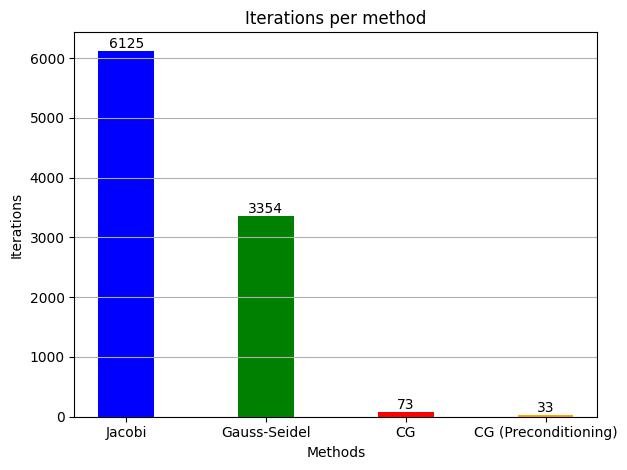

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (puedes reemplazarlos con tus propios valores)
categorias = ["Jacobi", "Gauss-Seidel", "CG", "CG (Preconditioning)"]
valores = [6125, 3354, 73, 33]

# Crea el gráfico de barras
fig, ax = plt.subplots()
bar_colors = ["blue", "green", "red", "orange"]  # Colores de las barras

# Agrega un índice numérico para cada categoría
x = np.arange(len(categorias))

# Define el ancho de cada barra y el espacio entre ellas
width = 0.4
spacing = 0.1

# Dibuja las barras con el espacio entre ellas
bars = ax.bar(x, valores, width, color=bar_colors)

# Personaliza el gráfico
plt.xlabel("Methods")
plt.ylabel("Iterations")
plt.title("Iterations per method")
plt.grid(axis="y")  # Agrega una cuadrícula en el eje Y

# Agrega los valores encima de cada columna
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Ajusta los límites y etiquetas del eje x
plt.xticks(x, categorias)
plt.tight_layout()

# Muestra el gráfico
plt.show()

These results show us that the Conjugate Gradient method (and its variant with preconditioning) was the most efficient in terms of convergence, requiring the least amount of iterations.

While the Gauss-Seidel and Jacobi methods took 3354 and 6125 iterations respectively, the Conjugate Gradient methods reached convergence in only 73 and 33 iterations. In this case, preconditioning had a significant impact on the number of iterations needed for convergence.

In summary, in this specific case, the Conjugate Gradient methods (with and without preconditioning) proved to be much more efficient in terms of convergence, requiring far fewer iterations than the Gauss-Seidel and Jacobi methods. These results highlight the advantage of Conjugate Gradient methods in solving more complex systems of equations.

